In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')
print(lin_data)

       input  pollution
0   0.240557   4.858750
1   0.159731   4.471091
2   0.108295   4.341897
3   0.233770   3.586844
4   0.283235   3.678243
..       ...        ...
95  0.070824   4.851617
96  0.055300   4.912696
97  0.138229   5.516441
98  0.007205   5.661260
99  0.290294   3.169049

[100 rows x 2 columns]


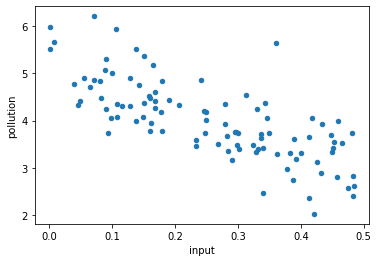

In [2]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')

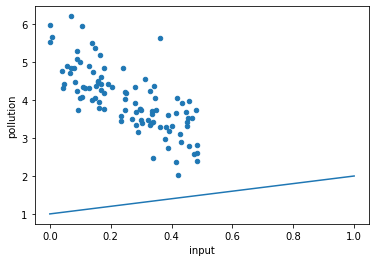

In [3]:
w, b = 1, 1
x0, x1 = 0.0, 1.0
def h(x, w, b):
   return w*x + b

lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

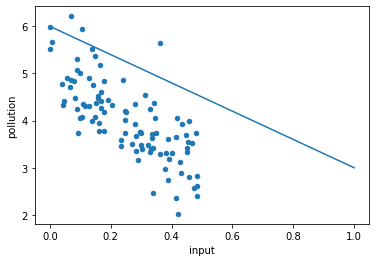

In [4]:
w, b = -3, 6
x0, x1 = 0.0, 1.0
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

In [5]:
import numpy as np
y_hat = np.array([1.2, 2.1, 2.9, 4.1, 4.7, 6.3, 7.1, 7.7, 8.5, 10.1])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
diff_square = (y_hat - y)**2
e_mse = diff_square.sum() / len(y)
e_mse

0.06099999999999996

In [6]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error:', mean_absolute_error(y_hat, y))

Mean absolute error: 0.20999999999999988


In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse

# 5개 점의 x, y 좌표값
x = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

steps = np.arange(1.0, 0.2, -0.1)
for i in list(steps):
   y_hat = i * x
   print('w = {:.1f}, 평균제곱 오차: {:.2f}'.format(i, mse(y_hat, y)))

w = 1.0, 평균제곱 오차: 23.08
w = 0.9, 평균제곱 오차: 15.86
w = 0.8, 평균제곱 오차: 10.13
w = 0.7, 평균제곱 오차: 5.89
w = 0.6, 평균제곱 오차: 3.13
w = 0.5, 평균제곱 오차: 1.85
w = 0.4, 평균제곱 오차: 2.06
w = 0.3, 평균제곱 오차: 3.75


In [8]:
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
y_pred = h(x, w, b)
error = (y_pred - y)
error

array([ 0.4195784 ,  1.04971677,  1.33321941,  1.71184524,  1.47205094,
        1.29651981,  0.90796599,  1.60479092,  0.43274803,  1.34273875,
        1.04704019,  0.17173389,  1.62983969,  2.71606203,  0.76239547,
        0.81910416,  1.68277334,  1.84517464,  1.83123493,  1.05999343,
        1.54915161,  1.62613855,  1.35757149,  0.9559527 ,  0.69384839,
        1.43756403,  1.00967404,  0.68616603,  1.73449862,  1.23144237,
        2.00034361,  1.34951392,  0.32087407, -0.2647334 ,  1.97698033,
        1.18131751,  1.72325619,  1.80163473, -0.42384495,  1.27631632,
        1.07877757,  0.64225129,  1.22905797,  1.07590731,  1.55013999,
        0.76691574,  1.67240252,  1.10559534,  1.27540987, -0.73003295,
        1.27263587,  1.63061935,  1.35614568,  1.58218579,  2.39535838,
        1.48261159,  1.524646  ,  1.60174464,  0.47302039,  1.09862732,
        1.22260149,  1.56899704,  0.02277376,  2.1449076 ,  1.47727095,
        1.8862379 ,  1.21790966,  2.51660705,  1.23173843,  0.61

In [9]:
learning_rate = 0.005
w = w - learning_rate * (error * x).sum()
b = b - learning_rate * error.sum()

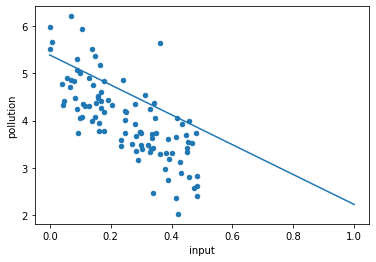

In [10]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

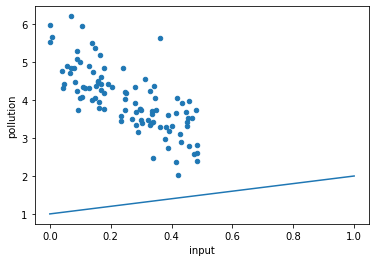

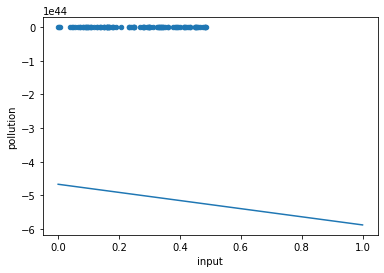

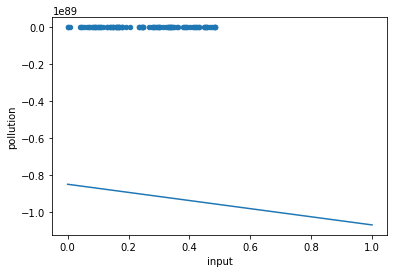

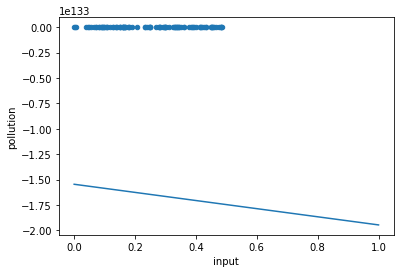

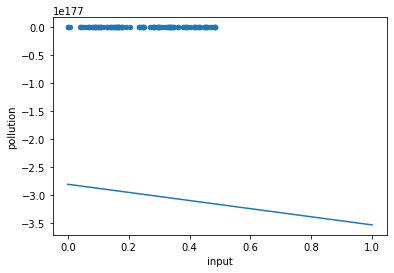

In [13]:
def h(x, param):
   return param[0]*x + param[1]

learning_iteration = 1000
learning_rate = 0.025

param = [1, 1] # w, b

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()

for i in range(learning_iteration):
    if i % 200 == 0:
        lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
        plt.plot([0, 1], [h(0, param), h(1, param)])

    error = ( h(x, param) - y)
    param[0] -= learning_rate * (error * x).sum()
    param[1] -= learning_rate * error.sum()

In [15]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

In [16]:
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis] 
print(x)

[[0.24055707]
 [0.1597306 ]
 [0.10829455]
 [0.23377033]
 [0.28323537]
 [0.12808583]
 [0.34549075]
 [0.33271329]
 [0.09001426]
 [0.11620483]
 [0.20601359]
 [0.15000132]
 [0.39294774]
 [0.4209191 ]
 [0.33071579]
 [0.48175618]
 [0.26858081]
 [0.2328081 ]
 [0.45704999]
 [0.24569785]
 [0.38236759]
 [0.29856761]
 [0.29944705]
 [0.44841195]
 [0.09896587]
 [0.04793845]
 [0.15920226]
 [0.41791947]
 [0.16082931]
 [0.24851334]
 [0.47514699]
 [0.29708178]
 [0.1653657 ]
 [0.10529827]
 [0.0932346 ]
 [0.15023707]
 [0.48271145]
 [0.28364396]
 [0.07020281]
 [0.17768318]
 [0.46604517]
 [0.45860857]
 [0.27905958]
 [0.16777949]
 [0.32352937]
 [0.4329887 ]
 [0.32825247]
 [0.03894147]
 [0.33719318]
 [0.36048117]
 [0.08236935]
 [0.36232547]
 [0.33608776]
 [0.13852276]
 [0.41330502]
 [0.14950648]
 [0.24760616]
 [0.10715455]
 [0.00153907]
 [0.45324442]
 [0.16725705]
 [0.16088719]
 [0.00066376]
 [0.48323703]
 [0.0902836 ]
 [0.3775714 ]
 [0.3501837 ]
 [0.33927998]
 [0.45179427]
 [0.17890406]
 [0.16829187]
 [0.24

In [17]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

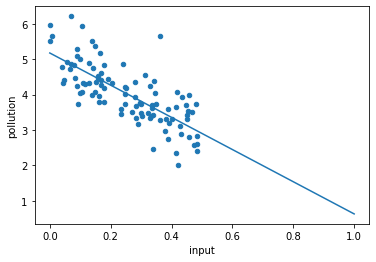

In [18]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
y_pred = regr.predict([[0], [1]])
plt.plot([0, 1], y_pred)

In [19]:
data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis]
X = np.c_[np.ones((100, 1)), x]          
print(X)

[[1.00000000e+00 2.40557071e-01]
 [1.00000000e+00 1.59730598e-01]
 [1.00000000e+00 1.08294551e-01]
 [1.00000000e+00 2.33770334e-01]
 [1.00000000e+00 2.83235375e-01]
 [1.00000000e+00 1.28085826e-01]
 [1.00000000e+00 3.45490753e-01]
 [1.00000000e+00 3.32713292e-01]
 [1.00000000e+00 9.00142565e-02]
 [1.00000000e+00 1.16204832e-01]
 [1.00000000e+00 2.06013589e-01]
 [1.00000000e+00 1.50001317e-01]
 [1.00000000e+00 3.92947744e-01]
 [1.00000000e+00 4.20919103e-01]
 [1.00000000e+00 3.30715790e-01]
 [1.00000000e+00 4.81756183e-01]
 [1.00000000e+00 2.68580809e-01]
 [1.00000000e+00 2.32808098e-01]
 [1.00000000e+00 4.57049987e-01]
 [1.00000000e+00 2.45697851e-01]
 [1.00000000e+00 3.82367589e-01]
 [1.00000000e+00 2.98567613e-01]
 [1.00000000e+00 2.99447048e-01]
 [1.00000000e+00 4.48411946e-01]
 [1.00000000e+00 9.89658723e-02]
 [1.00000000e+00 4.79384512e-02]
 [1.00000000e+00 1.59202264e-01]
 [1.00000000e+00 4.17919473e-01]
 [1.00000000e+00 1.60829312e-01]
 [1.00000000e+00 2.48513337e-01]
 [1.000000

In [20]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([ 5.17550358, -4.54449866])

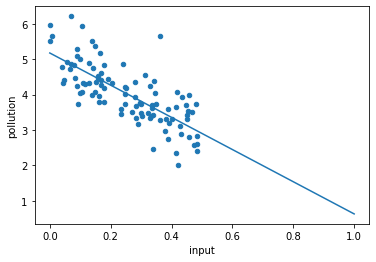

In [21]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')

def h(x, theta):
   return x*theta[1] + theta[0]

plt.plot([0, 1], [h(0, theta), h(1, theta)])